In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score, cohen_kappa_score, confusion_matrix
import tensorflow as tf

import cv2
import os

import numpy as np

In [2]:
labels = ['Non Oil Spill','Oil Spill']
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_data(r"C:\Users\Guptaji\OIL SPILL DETECTION USING CNN\oil-spill-dataset-binary-image-classification\final dataset used for oil spill\dataset-final\dataset\train")
val = get_data(r"C:\Users\Guptaji\OIL SPILL DETECTION USING CNN\oil-spill-dataset-binary-image-classification\final dataset used for oil spill\dataset-final\dataset\test")
test=get_data(r"C:\Users\Guptaji\OIL SPILL DETECTION USING CNN\oil-spill-dataset-binary-image-classification\final dataset used for oil spill\dataset-final\dataset\Validation")

C:\Users\Guptaji\AppData\Local\Temp\ipykernel_20456\825372583.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [4]:
#training dataset-oil spill
import os
len(os.listdir("C:\\Users\\Guptaji\\OIL SPILL DETECTION USING CNN\\oil-spill-dataset-binary-image-classification\\final dataset used for oil spill\\dataset-final\\dataset\\train\\Oil Spill"))

1400

In [5]:
#training dataset-Non oil spill
import os
len(os.listdir("C:\\Users\\Guptaji\\OIL SPILL DETECTION USING CNN\\oil-spill-dataset-binary-image-classification\\final dataset used for oil spill\\dataset-final\\dataset\\train\\Non Oil Spill"))

1400

In [6]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Non Oil Spill")
    else:
        l.append("Oil Spill")
sns.set_style('darkgrid')
#sns.countplot(l)

In [7]:
a = []
for i in val:
    if(i[1] == 0):
        a.append("Non Oil Spill")
    else:
        a.append("Oil Spill")
sns.set_style('darkgrid')
#sns.countplot(a)

In [8]:
b = []
for i in test:
    if(i[1] == 0):
        b.append("Non Oil Spill")
    else:
        b.append("Oil Spill")
sns.set_style('darkgrid')
#sns.countplot(b)

Text(0.5, 1.0, 'Non Oil Spill')

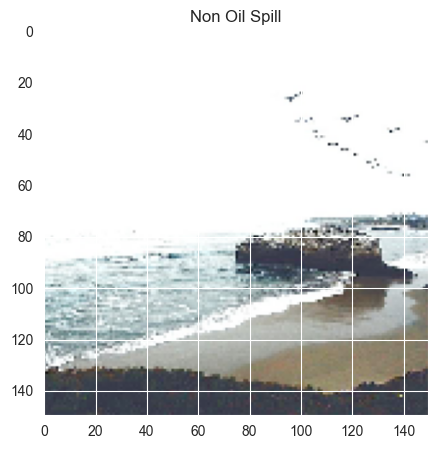

In [9]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])


Text(0.5, 1.0, 'Oil Spill')

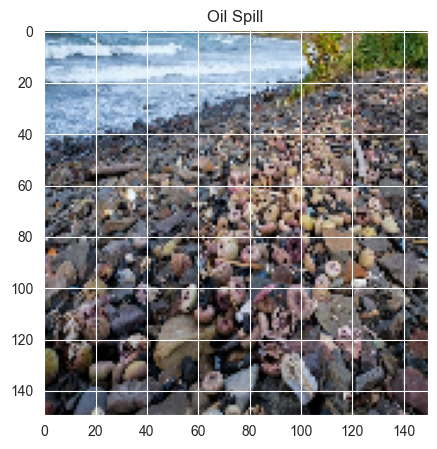

In [10]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [11]:
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test=np.array(x_test)/255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [12]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)
print("x_val:",x_val.shape)
print("y_val:",y_val.shape)

x_train: (2800, 150, 150, 3)
y_train: (2800,)
x_test: (600, 150, 150, 3)
y_test: (600,)
x_val: (600, 150, 150, 3)
y_val: (600,)


In [13]:
datagen = ImageDataGenerator(
       featurewise_center=False,  
       samplewise_center=False,  
       featurewise_std_normalization=False,  
       samplewise_std_normalization=False,  
       zca_whitening=False,  
       rotation_range = 90, 
       zoom_range = 0.5, 
       width_shift_range=0.2,  
       height_shift_range=0.2,  
       horizontal_flip = True,  
       
)


datagen.fit(x_train)
datagen.fit(x_val)
datagen.fit(x_test)

In [14]:
import time as t

In [15]:
# Create a custom SELU activation function
def selu(x):
    alpha = 1.67326
    scale = 1.0507
    return scale * tf.where(x > 0, x, alpha * (tf.exp(x) - 1))

In [16]:
act_fx=["linear","sigmoid","tanh","softmax","elu","relu","selu"]


In [17]:
def create_seq_model(act_fx):
    model = Sequential()
    model.add(Conv2D(32,(3,3),padding="same", activation=act_fx, input_shape=(150,150,3)))
    model.add(MaxPool2D((2, 2), strides=2))

    model.add(Conv2D(32, (3,3), padding="same", activation=act_fx))
    model.add(MaxPool2D((2, 2), strides=2))

    model.add(Conv2D(64, (3,3), padding="same", activation=act_fx))
    model.add(MaxPool2D((2, 2), strides=2))

    model.add(Conv2D(64,(3,3), padding="same", activation=act_fx))
    model.add(MaxPool2D((2, 2), strides=2))


    model.add(Dropout(0.2))
    model.add(Flatten())
    #model.add(Dense(128,activation="relu"))
    """
    model.add(Dense(84,activation="relu"))
    model.add(Dense(32,activation="relu"))
    """
    model.add(Dense(2, activation="softmax"))

    model.summary()
    return model

In [18]:
def compile_and_fit(model):
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

    history = model.fit(x_train,y_train,epochs =100,validation_data = (x_val, y_val),shuffle=True,batch_size=64)
    return history

In [19]:
def conf_mat(pred):
    cm=confusion_matrix(pred,y_test)

    import seaborn as sns
    import matplotlib.pyplot as plt

    class_report=sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    print(class_report)


In [20]:
def plot_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(100)

    plt.figure(figsize=(15, 15))
    plt.subplot(2, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [21]:
def prediction_and_evaluation(model):
    predictions = model.predict(x_test)
    pred=np.argmax(predictions,axis=1)
    pred = pred.reshape(1,-1)[0]
    
    # F beta score with beta=2
    beta = 2
    f_beta = fbeta_score(y_test, pred, beta=beta)

    # Cohen's Kappa score
    kappa = cohen_kappa_score(y_test, pred)
    print('\nf_beta score=',f_beta)
    print("Cohen's Kappa score=",kappa)
    print(classification_report(y_test,pred, target_names = ['Non Oil Spill(Class 0)','Oil Spill (Class 1)']))
    conf_mat(pred)
    
    model.evaluate(x_test,y_test,batch_size=64)
    print(pred.shape)
    
    print(y_test.shape)

Start training using activation function : linear
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_p

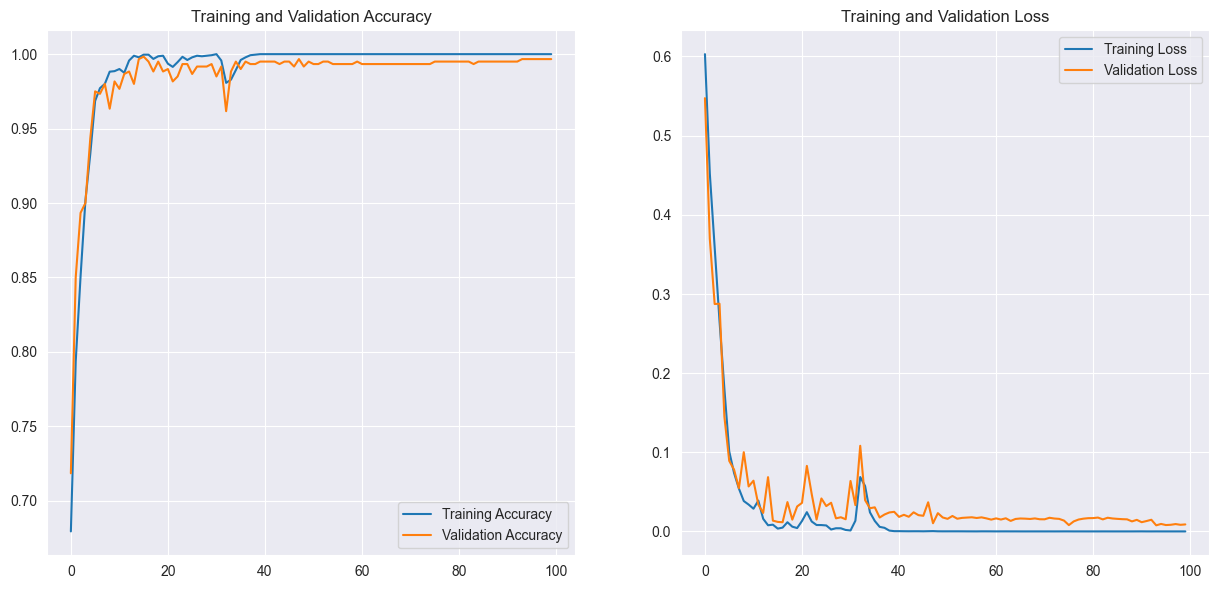

19/19 [==============================] - 2s 78ms/step

f_beta score= 0.9939959973315543
Cohen's Kappa score= 0.99
                        precision    recall  f1-score   support

Non Oil Spill(Class 0)       0.99      1.00      1.00       300
   Oil Spill (Class 1)       1.00      0.99      0.99       300

              accuracy                           0.99       600
             macro avg       1.00      0.99      0.99       600
          weighted avg       1.00      0.99      0.99       600



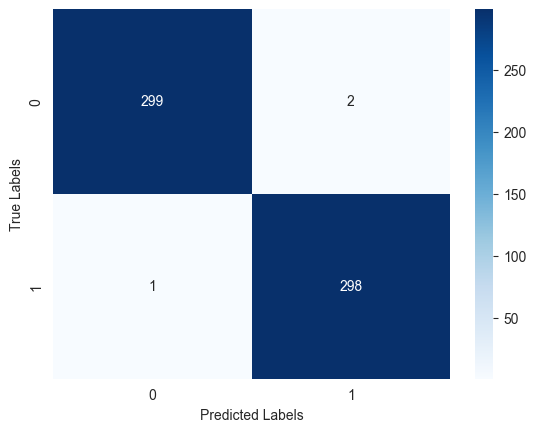

AxesSubplot(0.125,0.11;0.62x0.77)
10/10 [==============================] - 1s 143ms/step - loss: 0.0184 - accuracy: 0.9950
(600,)
(600,)
Saved model to disk
Start training using activation function : sigmoid
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                            

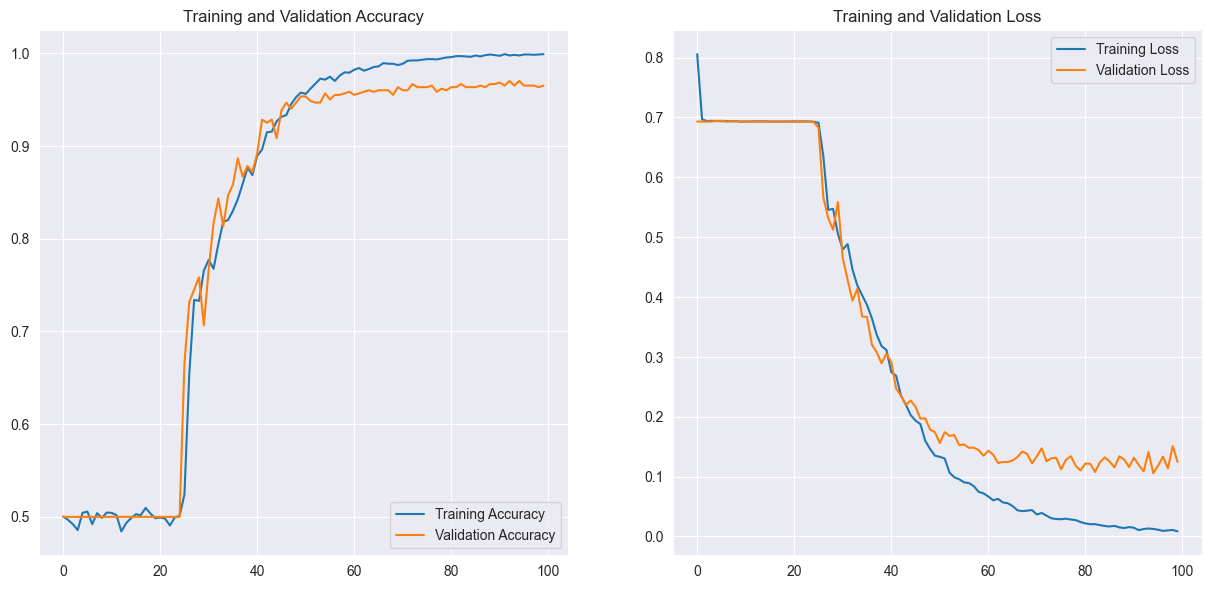

19/19 [==============================] - 1s 69ms/step

f_beta score= 0.9084745762711863
Cohen's Kappa score= 0.87
                        precision    recall  f1-score   support

Non Oil Spill(Class 0)       0.90      0.98      0.94       300
   Oil Spill (Class 1)       0.97      0.89      0.93       300

              accuracy                           0.94       600
             macro avg       0.94      0.94      0.93       600
          weighted avg       0.94      0.94      0.93       600



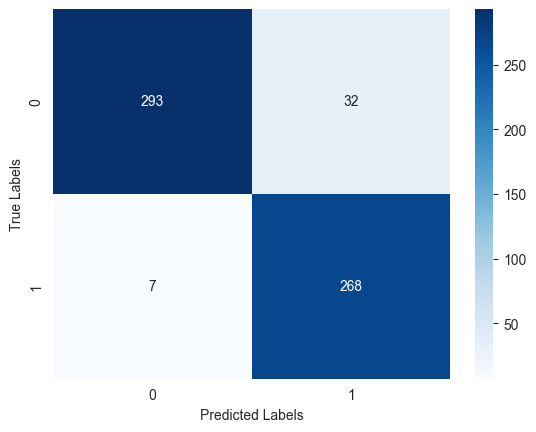

AxesSubplot(0.125,0.11;0.62x0.77)
10/10 [==============================] - 1s 129ms/step - loss: 0.1702 - accuracy: 0.9350
(600,)
(600,)
Saved model to disk
Start training using activation function : tanh
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                               

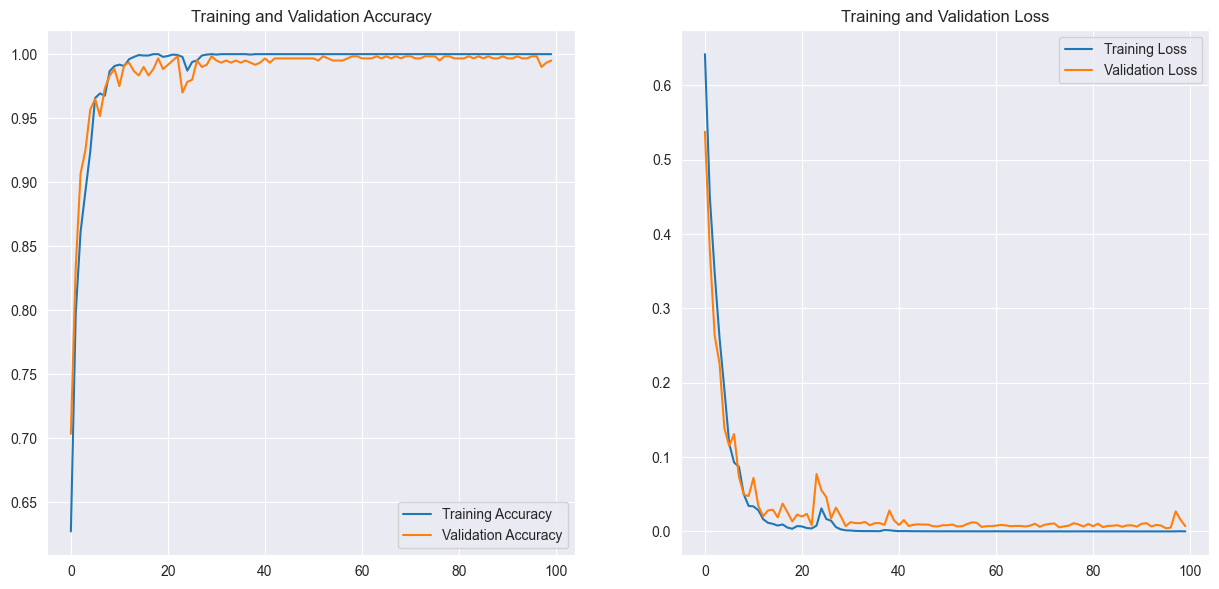

19/19 [==============================] - 2s 74ms/step

f_beta score= 0.9866220735785952
Cohen's Kappa score= 0.9833333333333333
                        precision    recall  f1-score   support

Non Oil Spill(Class 0)       0.98      1.00      0.99       300
   Oil Spill (Class 1)       1.00      0.98      0.99       300

              accuracy                           0.99       600
             macro avg       0.99      0.99      0.99       600
          weighted avg       0.99      0.99      0.99       600



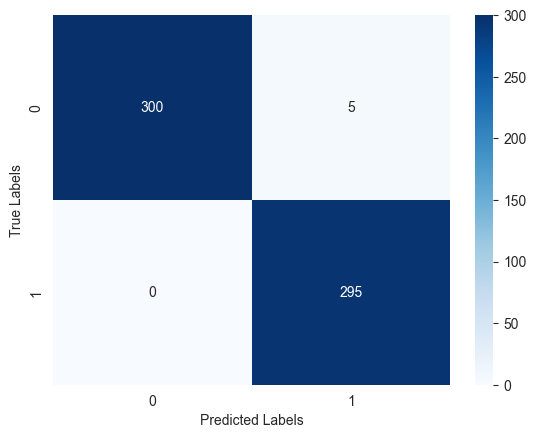

AxesSubplot(0.125,0.11;0.62x0.77)
10/10 [==============================] - 1s 135ms/step - loss: 0.0114 - accuracy: 0.9917
(600,)
(600,)
Saved model to disk
Start training using activation function : softmax
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 37, 37, 32)        0         
 ng2D)                                                           
                                            

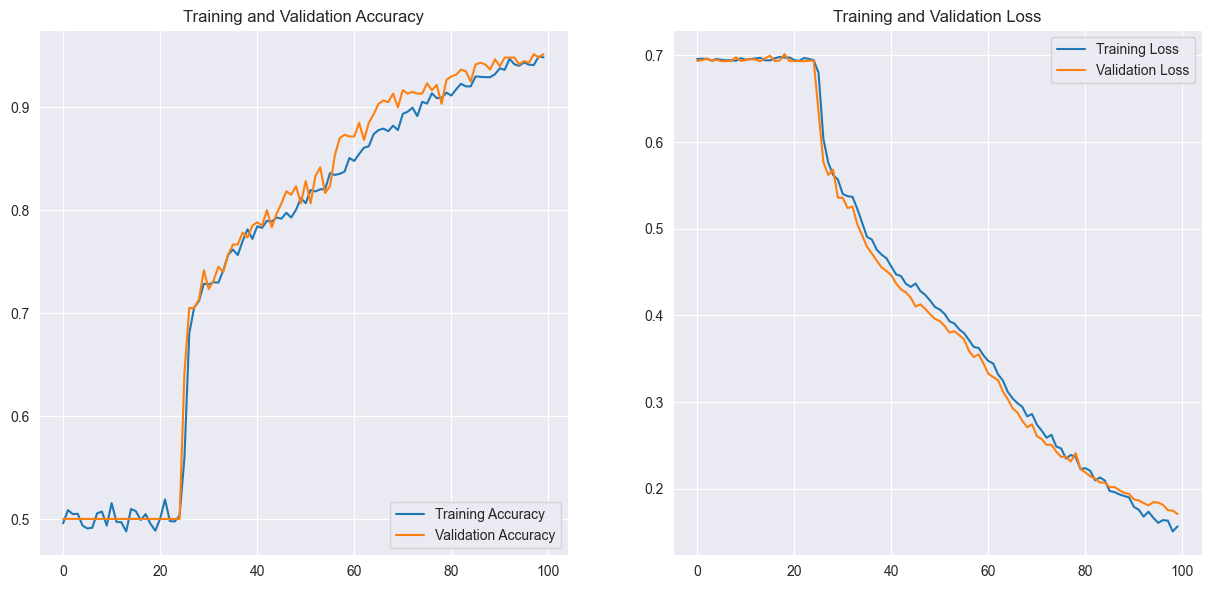

19/19 [==============================] - 3s 128ms/step

f_beta score= 0.8149171270718231
Cohen's Kappa score= 0.7466666666666666
                        precision    recall  f1-score   support

Non Oil Spill(Class 0)       0.82      0.96      0.88       300
   Oil Spill (Class 1)       0.95      0.79      0.86       300

              accuracy                           0.87       600
             macro avg       0.88      0.87      0.87       600
          weighted avg       0.88      0.87      0.87       600



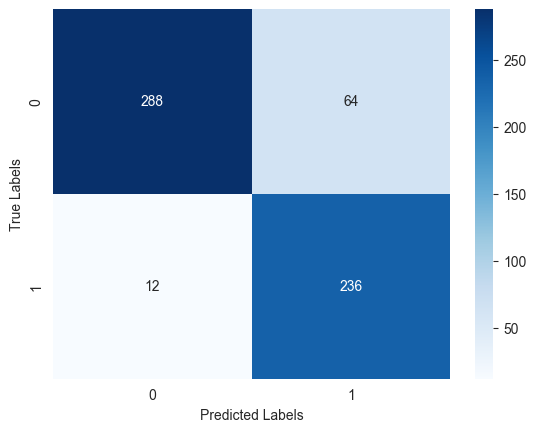

AxesSubplot(0.125,0.11;0.62x0.77)
10/10 [==============================] - 3s 247ms/step - loss: 0.3754 - accuracy: 0.8733
(600,)
(600,)
Saved model to disk
Start training using activation function : elu
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 37, 37, 32)        0         
 ng2D)                                                           
                                                

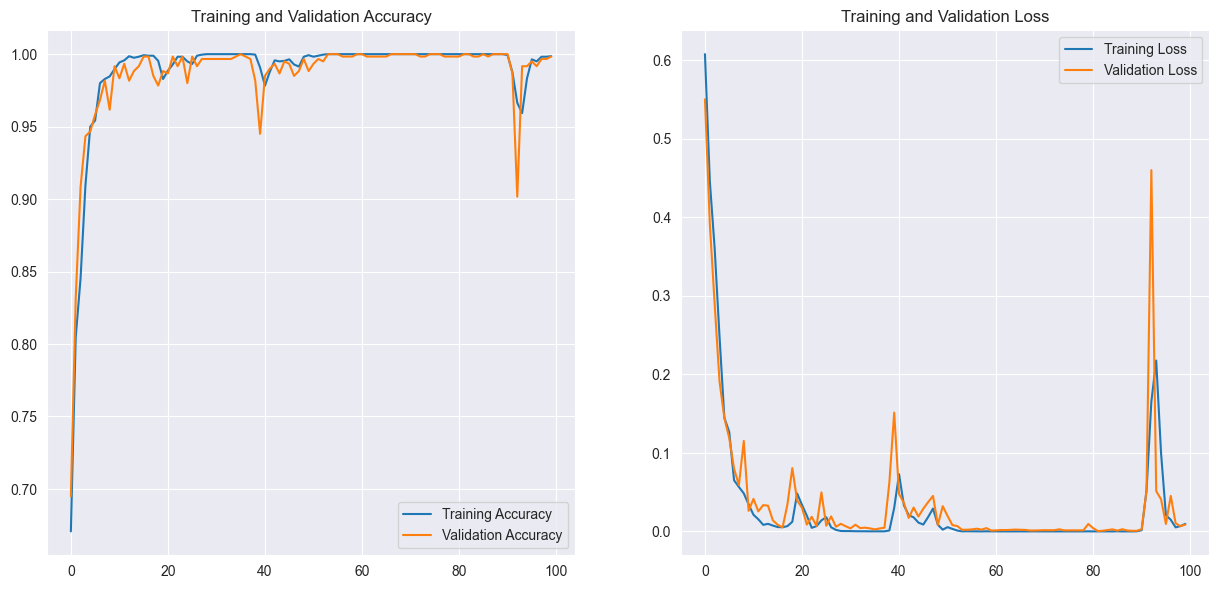

19/19 [==============================] - 1s 69ms/step

f_beta score= 0.9785522788203754
Cohen's Kappa score= 0.9733333333333334
                        precision    recall  f1-score   support

Non Oil Spill(Class 0)       0.97      1.00      0.99       300
   Oil Spill (Class 1)       1.00      0.97      0.99       300

              accuracy                           0.99       600
             macro avg       0.99      0.99      0.99       600
          weighted avg       0.99      0.99      0.99       600



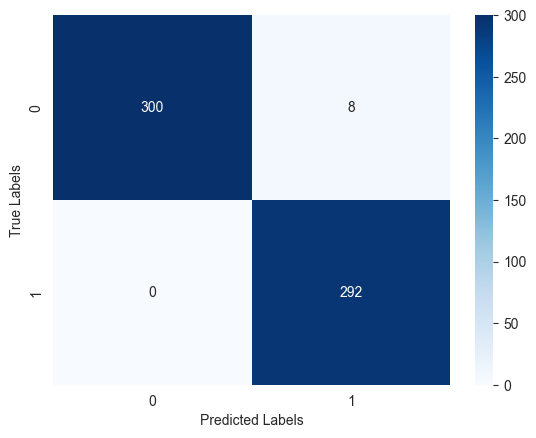

AxesSubplot(0.125,0.11;0.62x0.77)
10/10 [==============================] - 1s 129ms/step - loss: 0.0515 - accuracy: 0.9867
(600,)
(600,)
Saved model to disk
Start training using activation function : relu
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 37, 37, 32)        0         
 ng2D)                                                           
                                               

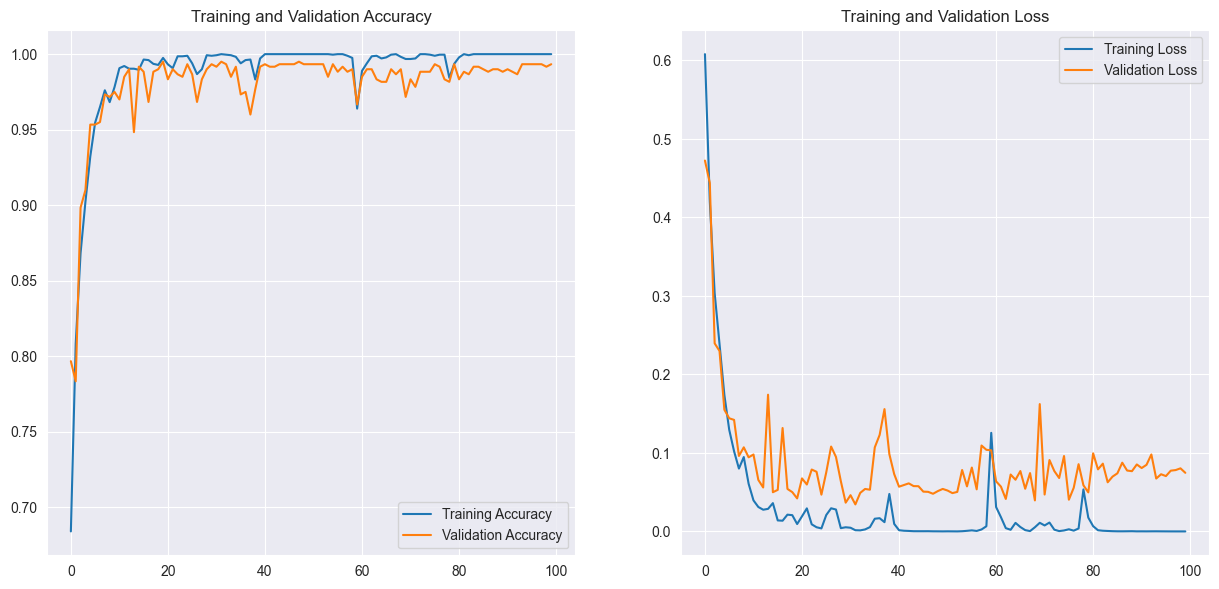

19/19 [==============================] - 1s 66ms/step

f_beta score= 0.9785522788203754
Cohen's Kappa score= 0.9733333333333334
                        precision    recall  f1-score   support

Non Oil Spill(Class 0)       0.97      1.00      0.99       300
   Oil Spill (Class 1)       1.00      0.97      0.99       300

              accuracy                           0.99       600
             macro avg       0.99      0.99      0.99       600
          weighted avg       0.99      0.99      0.99       600



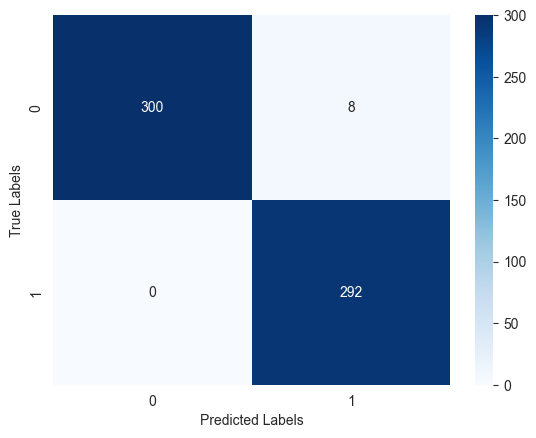

AxesSubplot(0.125,0.11;0.62x0.77)
10/10 [==============================] - 1s 111ms/step - loss: 0.0362 - accuracy: 0.9867
(600,)
(600,)
Saved model to disk
Start training using activation function : selu
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 37, 37, 32)        0         
 ng2D)                                                           
                                               

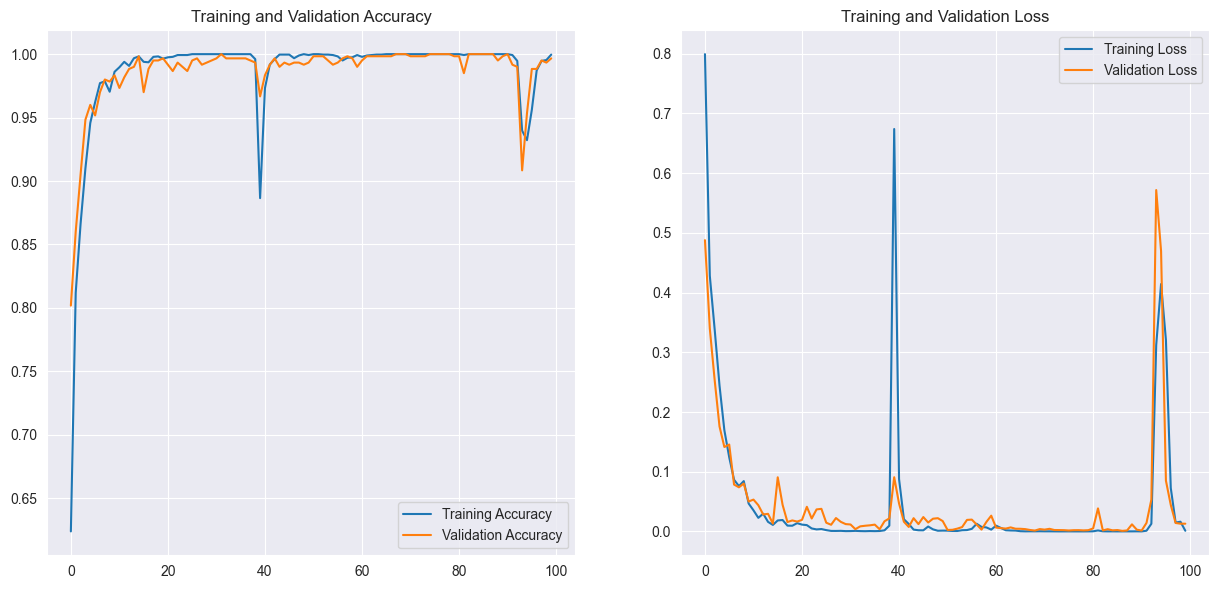

19/19 [==============================] - 1s 69ms/step

f_beta score= 0.9839357429718876
Cohen's Kappa score= 0.98
                        precision    recall  f1-score   support

Non Oil Spill(Class 0)       0.98      1.00      0.99       300
   Oil Spill (Class 1)       1.00      0.98      0.99       300

              accuracy                           0.99       600
             macro avg       0.99      0.99      0.99       600
          weighted avg       0.99      0.99      0.99       600



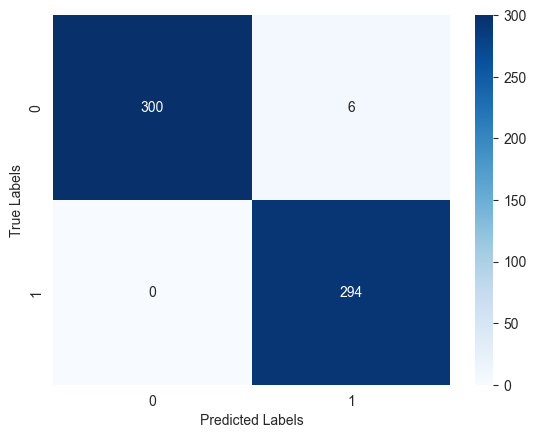

AxesSubplot(0.125,0.11;0.62x0.77)
10/10 [==============================] - 1s 123ms/step - loss: 0.0310 - accuracy: 0.9900
(600,)
(600,)
Saved model to disk


In [22]:
for act in act_fx:
    start_time=t.time()
    print("Start training using activation function :",act)
    model=create_seq_model(act)
    history = compile_and_fit(model)
    end_time=t.time()
    print("Training complete on above activation function in time :",end_time-start_time)
    plot_curves(history)
    prediction_and_evaluation(model)
    
    model_json=model.to_json()
    with open("model.json","w") as json_file:
        json_file.write(model_json)
    model.save_weights("oil_spill_detection_on_"+act+".h5")
    print("Saved model to disk")

In [23]:
'''from tensorflow.keras.models import model_from_json
json_file=open('model.json','r')
loaded_model_json=json_file.read()
json_file.close()
model.load_weights("model.h5")
print("Loaded model from disk")'''

'from tensorflow.keras.models import model_from_json\njson_file=open(\'model.json\',\'r\')\nloaded_model_json=json_file.read()\njson_file.close()\nmodel.load_weights("model.h5")\nprint("Loaded model from disk")'

In [24]:
'''predictions = model.predict(x_test)
pred=np.argmax(predictions,axis=1)
pred = pred.reshape(1,-1)[0]
print(classification_report(y_test,pred, target_names = ['Non Oil Spill(Class 0)','Oil Spill (Class 1)']))

model.evaluate(x_test,y_test,batch_size=64)
print(pred.shape)

print(y_test.shape)'''

"predictions = model.predict(x_test)\npred=np.argmax(predictions,axis=1)\npred = pred.reshape(1,-1)[0]\nprint(classification_report(y_test,pred, target_names = ['Non Oil Spill(Class 0)','Oil Spill (Class 1)']))\n\nmodel.evaluate(x_test,y_test,batch_size=64)\nprint(pred.shape)\n\nprint(y_test.shape)"